In [1]:
import numpy as np
import pandas as pd
#import graphviz   #for visualization of leaf nodes
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#control diplay(optional)
pd.options.display.max_columns=50
sns.set(style='darkgrid',rc={'axes.facecolor':'#DCDCDC'})


#code for ignoring warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#LOAD and read dataset
df=pd.read_csv('heart_disease.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#logistic regression
#column targets
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [4]:
#get the mean for training data
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


<function matplotlib.pyplot.show(close=None, block=None)>

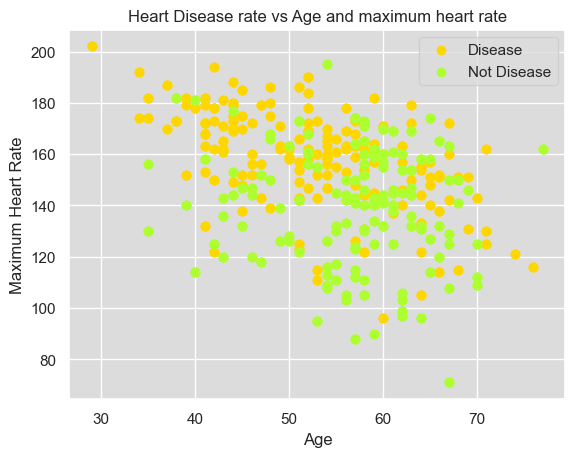

In [6]:
#create a scatter plot for heart disease vs age and maximum heartb rate
plt.scatter(x=df.age[df.target==1], y=df.thalach[df.target==1], c='#FFD700', label='Disease')
plt.scatter(x=df.age[df.target==0], y=df.thalach[df.target==0], c='#ADFF2F', label='Not Disease')

#Add a legend
plt.legend()
#add labelx to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

#set title of plot
plt.title ('Heart Disease rate vs Age and maximum heart rate')
plt.show

In [7]:
#create a logistic regression
#create independent and dependent variables

y=df.target.values
x_data=df.drop(['target'], axis=1)

In [8]:
#Normalize the data
x = (x_data - np.min(x_data)) / (np.max(x_data)) - np.min(x_data)

In [9]:
#split the data 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [10]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [11]:
#get the accuracy using the logistic regression
#getting the test accuracy
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T)*100

accuracies['LogisticRegression'] = acc

#get output
print('Test Accuracy {:.2f}%'.format(acc))

Test Accuracy 72.68%


In [22]:
#first import the K-Nearest Neighbours classifier
#get accuracy score of the K-Nearest neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

#get output display
print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 95.12%


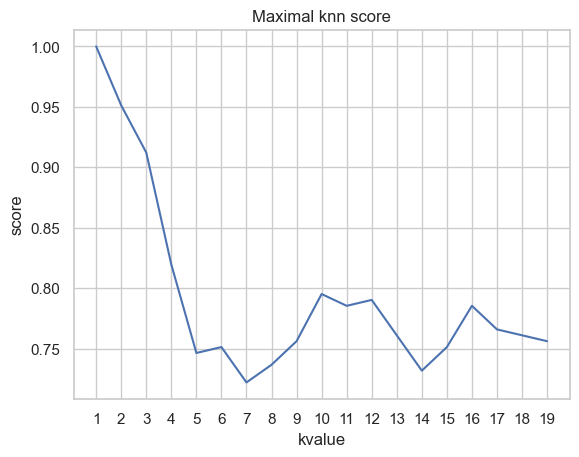

maximum knn score is100.00%


In [23]:
# get the maximum knn score for the model
score_list=[]
for i in range(1,20):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train.T,y_train.T)
    score_list.append(knn2.score(x_test.T,y_test.T))
# show using the line plot
plt.plot(range(1,20),score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('kvalue')
plt.ylabel('score')
plt.title('Maximal knn score')
plt.show()
# get the maximum knn score for the model in percentage
acc=max(score_list)*100
accuracies['KNN']=acc
print('maximum knn score is{:.2f}%'.format(acc))

In [17]:
#get test accuracy using the support vector machine algorithm
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T, y_train.T)*100
accuracies['SVM'] = acc
print('Test accuracy of SVM alorithm: {:.2f}%'.format(acc))

Test accuracy of SVM alorithm: 70.24%


In [24]:
 # get accuracy using naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train.T,y_train.T)
acc=nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes']=acc
print('Accuracy of Naive Bayes algorithm:{:.2f}%'.format(acc))

Accuracy of Naive Bayes algorithm:85.37%


In [19]:
#get accuracy using decision tree model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc=dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc

print('Decision Tree test accuracy score:{:.2f}%'.format(acc))

Decision Tree test accuracy score:100.00%


In [20]:
#get accuracy using random forest algorithm
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train.T, y_train.T)

acc=rf.score(x_test.T, y_test.T)*100
accuracies['Random Forest'] = acc

print('Random forest algorithm accuracy score:{:.2f}%'.format(acc))

Random forest algorithm accuracy score:100.00%


<Axes: title={'center': 'compare the models accuracies using the barplot'}, xlabel='ML Model Algorithm', ylabel='Accuracy %'>

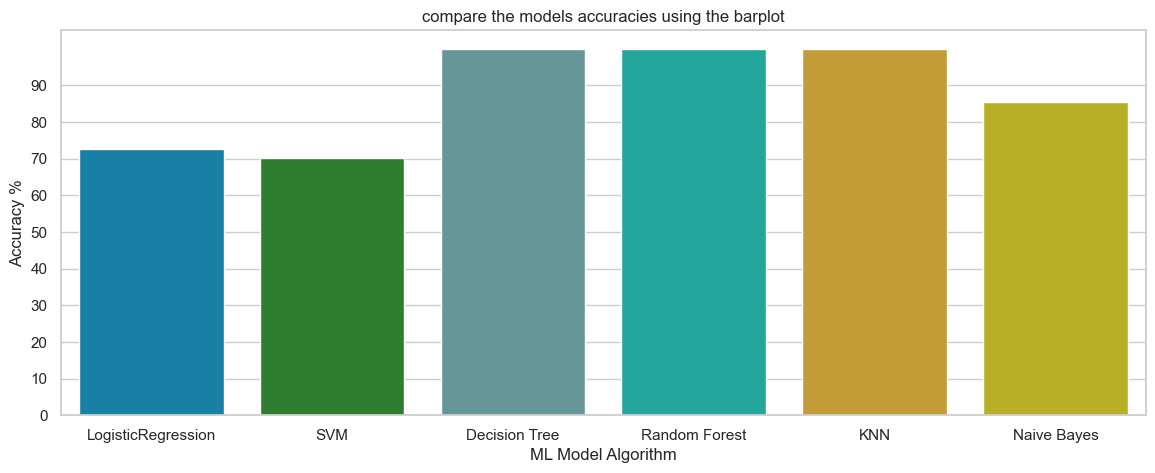

In [25]:
#compare the models accuracies using the barplot from sns
colors = ['#008BBB', '#228B22', '#5F9EA0', '#0FBBAE', '#DAA520', '#CFC60E']

sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.yticks(np.arange(0,100,10))
plt.title('compare the models accuracies using the barplot')
plt.ylabel('Accuracy %')
plt.xlabel('ML Model Algorithm')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

In [ ]:
#ML Confusion Matrix

In [27]:
#Get confusion matrices to look at the imbalance dataset
#predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)


In [28]:
#import module for confusion matrix
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_rf = confusion_matrix(y_test, y_head_rf)

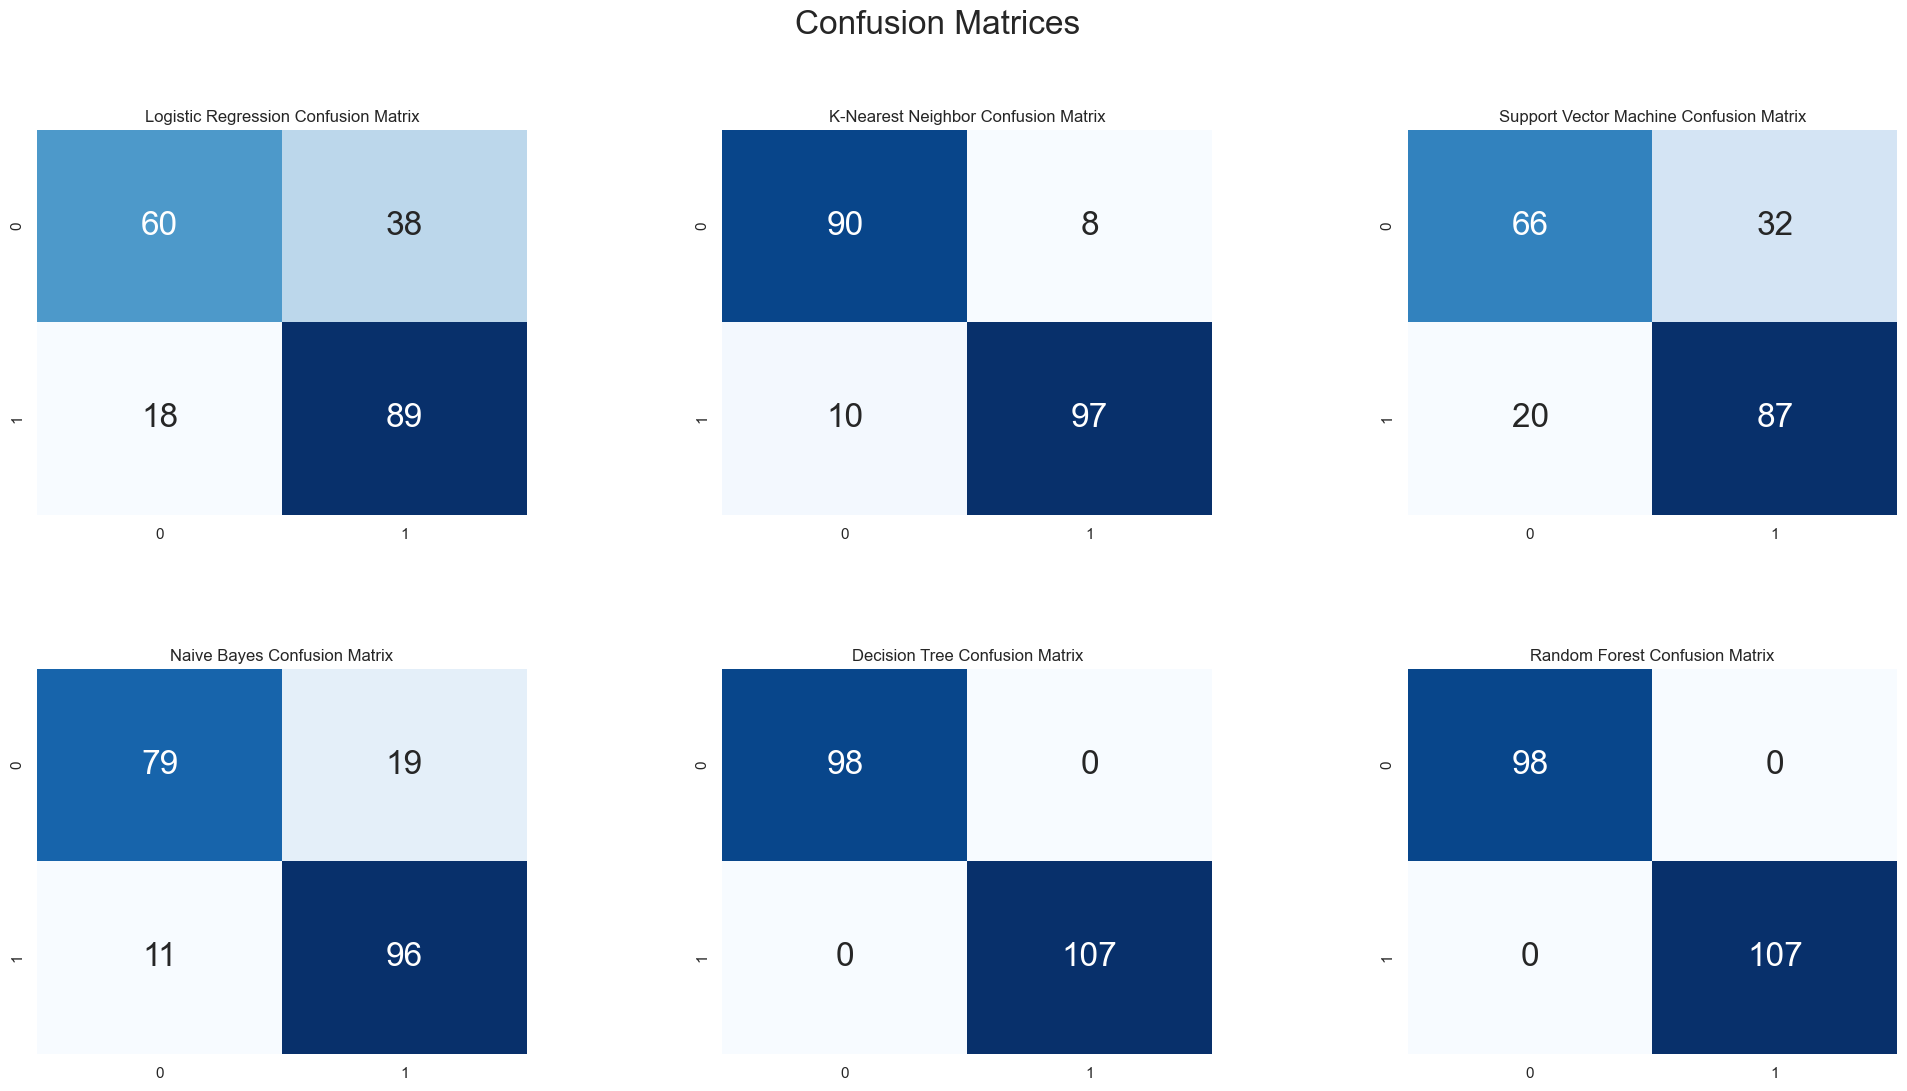

In [30]:
 # plotting for heatmap using confusion matrix
plt.figure(figsize=(24,12))

plt.suptitle('Confusion Matrices',fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#logistic regression confusion matrix using heatmap
plt.subplot(2,3,1)
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(cm_lr,annot=True,cmap='Blues',fmt='d',cbar=False, annot_kws={'size':24})

# heatmap for KNN
plt.subplot(2,3,2)
plt.title('K-Nearest Neighbor Confusion Matrix')
sns.heatmap(cm_knn,annot=True,cmap='Blues',fmt='d',cbar=False, annot_kws={'size':24})

# heatmap for SVM
plt.subplot(2,3,3)
plt.title('Support Vector Machine Confusion Matrix')
sns.heatmap(cm_svm,annot=True,cmap='Blues',fmt='d',cbar=False, annot_kws={'size':24})

# heatmap for Naive Bayes
plt.subplot(2,3,4)
plt.title('Naive Bayes Confusion Matrix')
sns.heatmap(cm_nb,annot=True,cmap='Blues',fmt='d',cbar=False, annot_kws={'size':24})

# heatmap for Decision Tree Classifier
plt.subplot(2,3,5)
plt.title('Decision Tree Confusion Matrix')
sns.heatmap(cm_dtc,annot=True,cmap='Blues',fmt='d',cbar=False, annot_kws={'size':24})

# heatmap for Random Forest
plt.subplot(2,3,6)
plt.title('Random Forest Confusion Matrix')
sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt='d',cbar=False, annot_kws={'size':24})
plt.show()
